# Variable Analysis

In this Jupyter notebook, we present several visualizations to analyze which predictor variables we will use for our traditional credit score model. These analyses help us identify the most relevant features to accurately assess creditworthiness and build a reliable scoring system.

### Import libraries

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Heatmap

In this section, we will visualize the correlation matrix of numerical predictor variables using a heatmap. The heatmap shows the strength of the linear relationship between each pair of variables, with colors indicating the correlation coefficients.

This will help us identify multicollinearity among predictors and guide the selection of relevant features for the model. The heatmap provides a quick way to assess which variables are highly correlated and may require further investigation or adjustments.


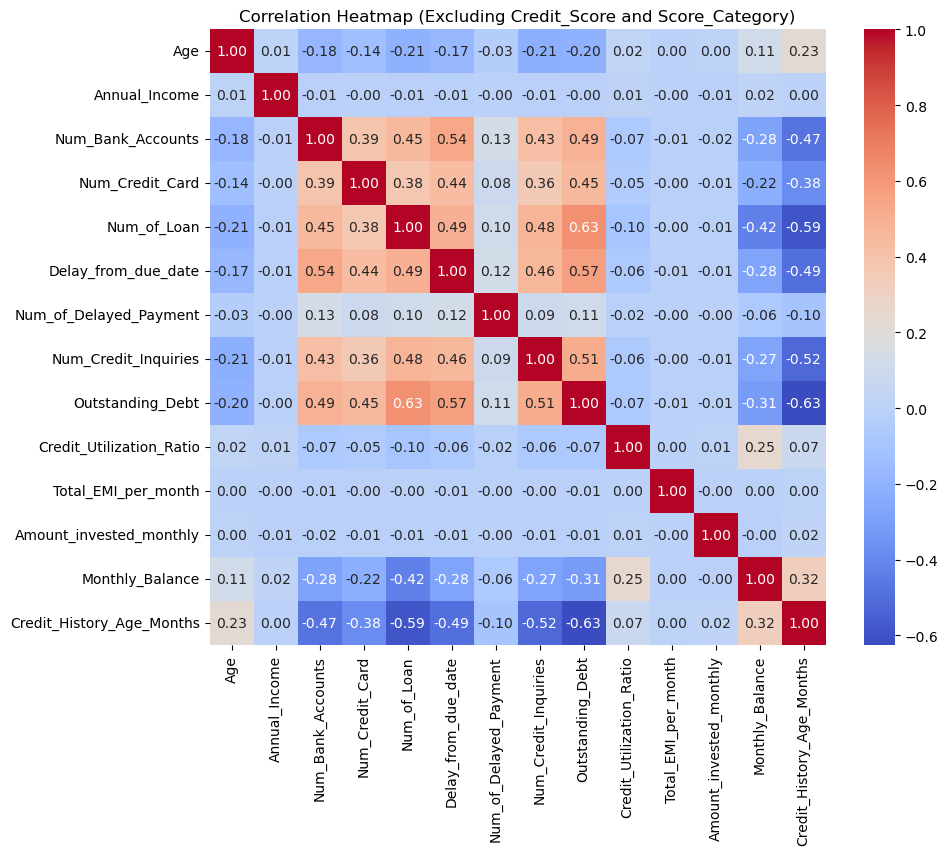

In [28]:
# Load the dataset
df = pd.read_csv('train_cleaned.csv')

# Drop 'Credit_Score' and 'Score_Category' columns
df_cleaned = df.drop(columns=['Credit_Score', 'Score_Category'])

# Select only numeric columns
numeric_df = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Set the title
plt.title('Correlation Heatmap (Excluding Credit_Score and Score_Category)')
plt.show()

### Violin Plots

In this section, we will create violin plots to visualize the distribution of the `Credit_Score` across different categorical predictor variables. Each violin plot represents the density of the `Credit_Score` values for each category of the predictor variable. The plots will help us understand how `Credit_Score` varies with respect to the different categories.

- The y-axis represents the `Credit_Score`.
- The x-axis represents the categorical predictor variables.

The violins will give insights into the spread and concentration of `Credit_Score` for each category.

Categorical predictors: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


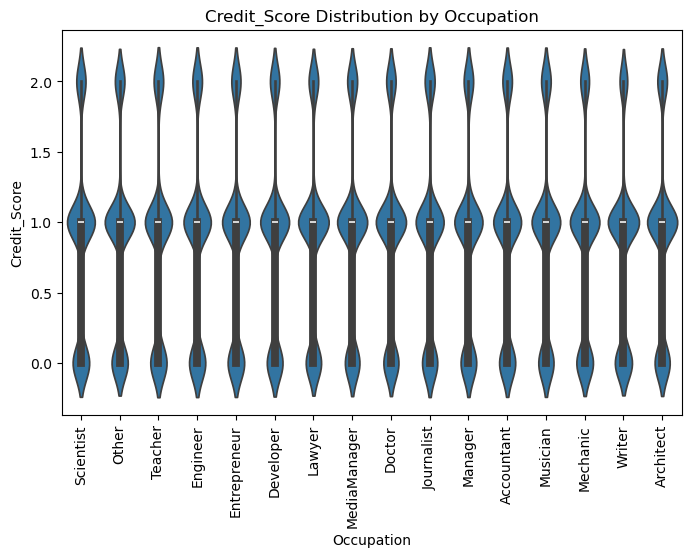

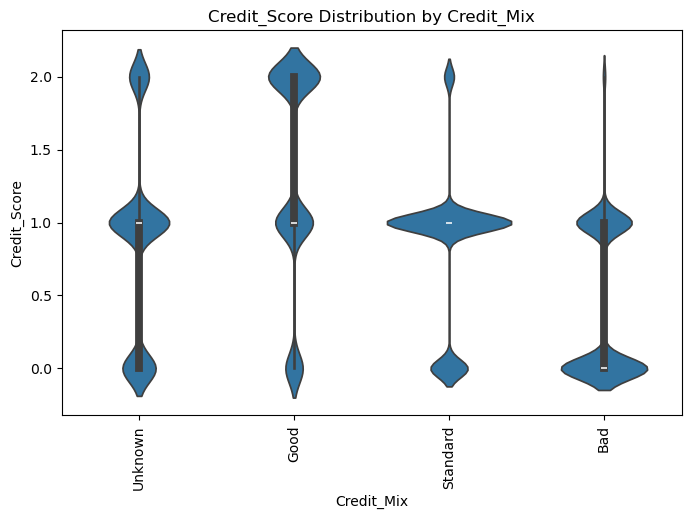

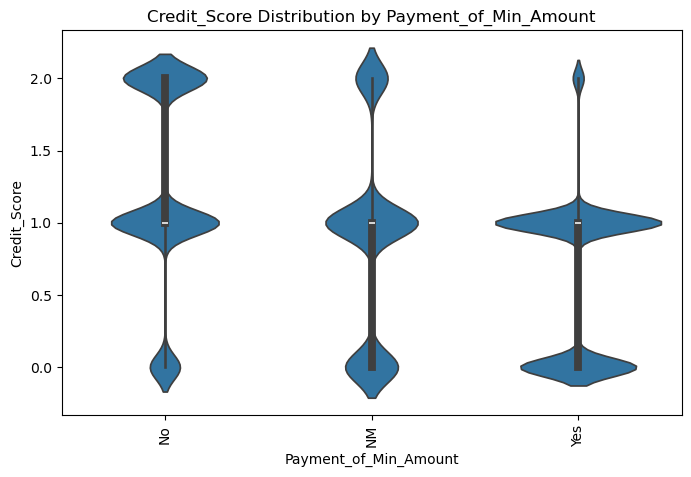

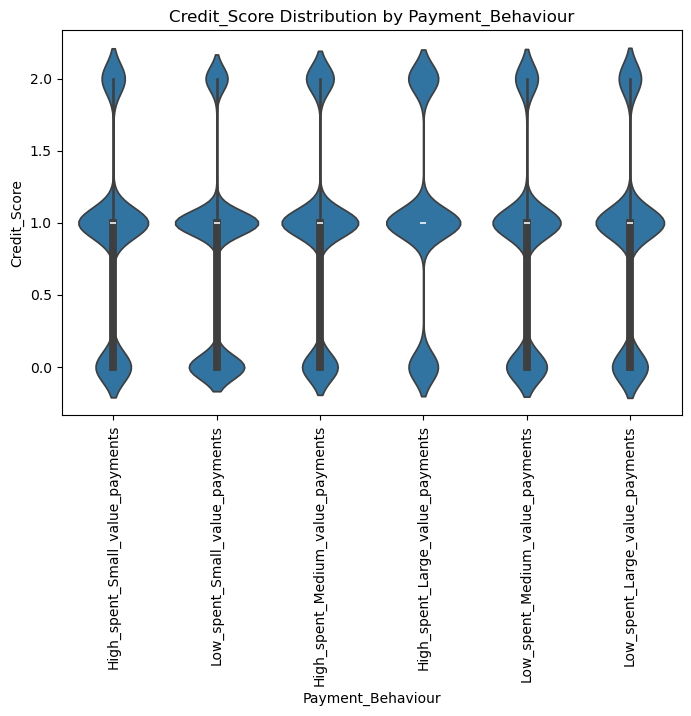

In [30]:
# Set the target variables to exclude
targets = ['Credit_Score', 'Score_Category']

# Identify predictors (all columns except the targets)
predictors = [col for col in df.columns if col not in targets]

# Filter for categorical predictors (assuming these are stored as type 'object')
cat_predictors = [col for col in predictors if df[col].dtype == 'object']
print("Categorical predictors:", cat_predictors)

# Create a violin plot for each categorical predictor with Credit_Score on the y-axis
for col in cat_predictors:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x=col, y=target, data=df)
    plt.title(f'Credit_Score Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Credit_Score')
    # Rotate the x-axis labels vertically
    plt.xticks(rotation=90)
    plt.show()

### Histograms

In this section, we will visualize the distribution of numerical predictor variables with respect to the `Credit_Score` categories. For each numerical variable, we will overlay three histograms on the same plot. The histograms represent the distribution of data for each `Credit_Score` category (0, 1, and 2) using different colors: 

- Red for `Credit_Score = 0`
- Blue for `Credit_Score = 1`
- Green for `Credit_Score = 2`

This will help us understand how each predictor variable behaves across the different `Credit_Score` categories.

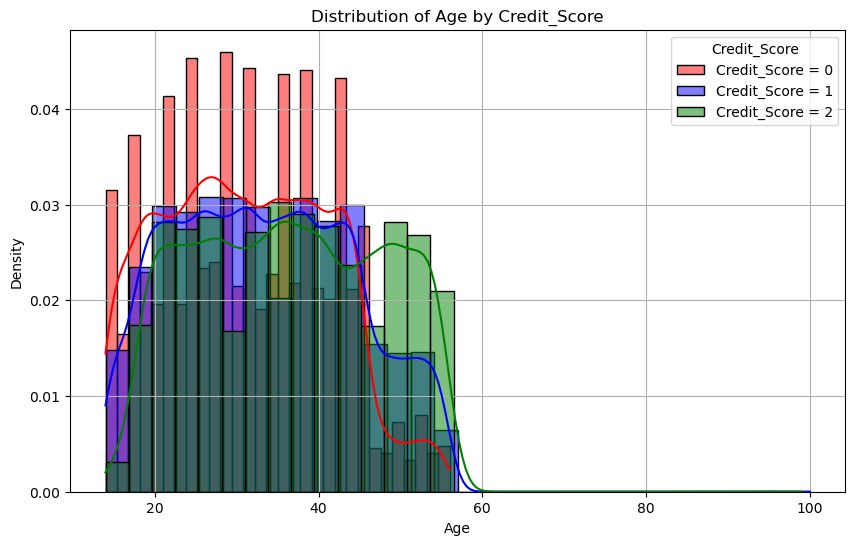

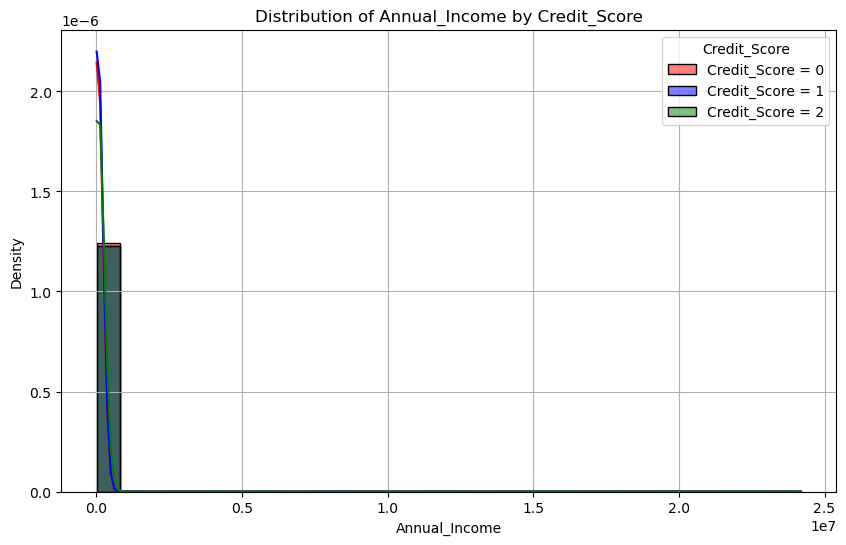

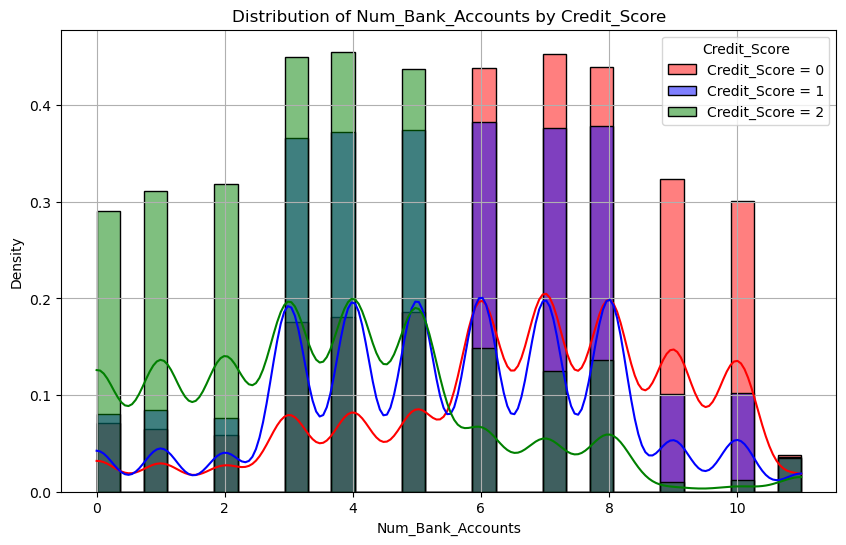

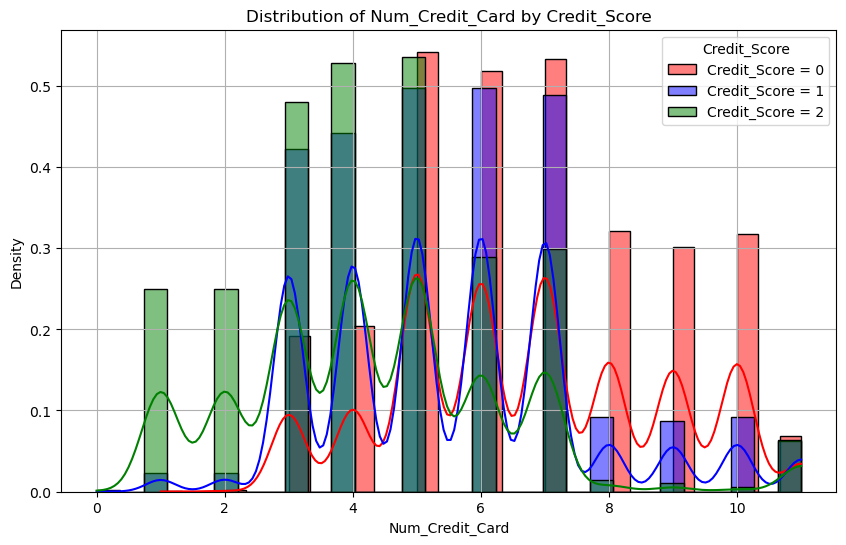

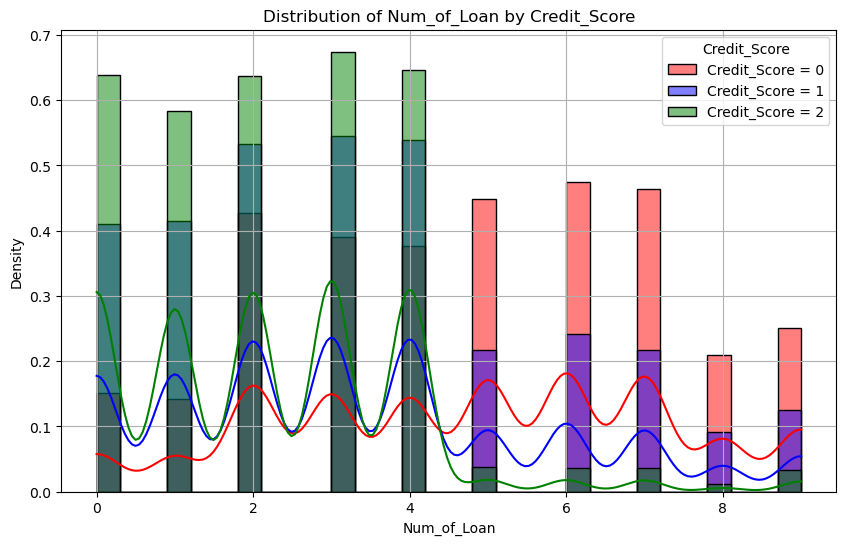

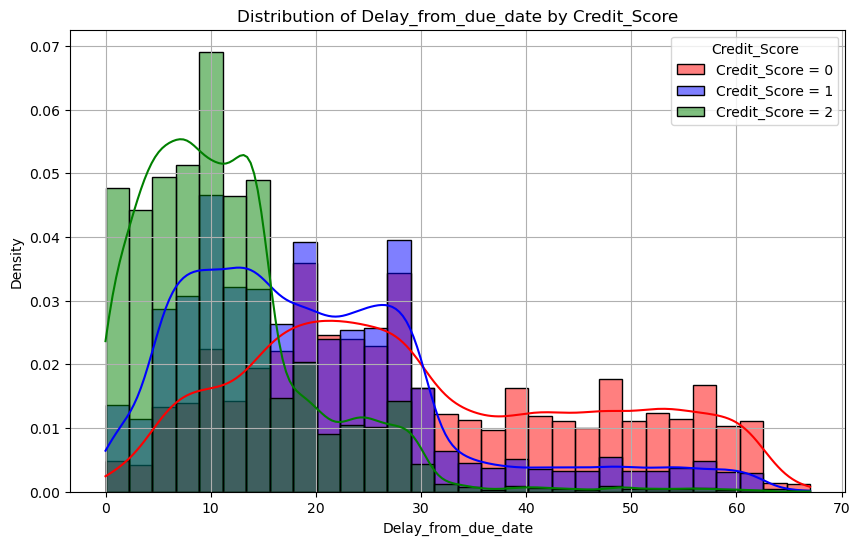

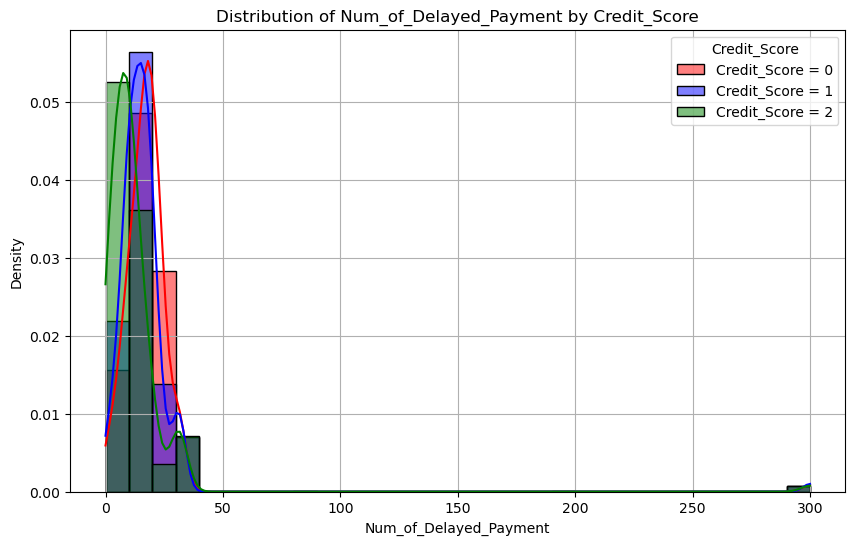

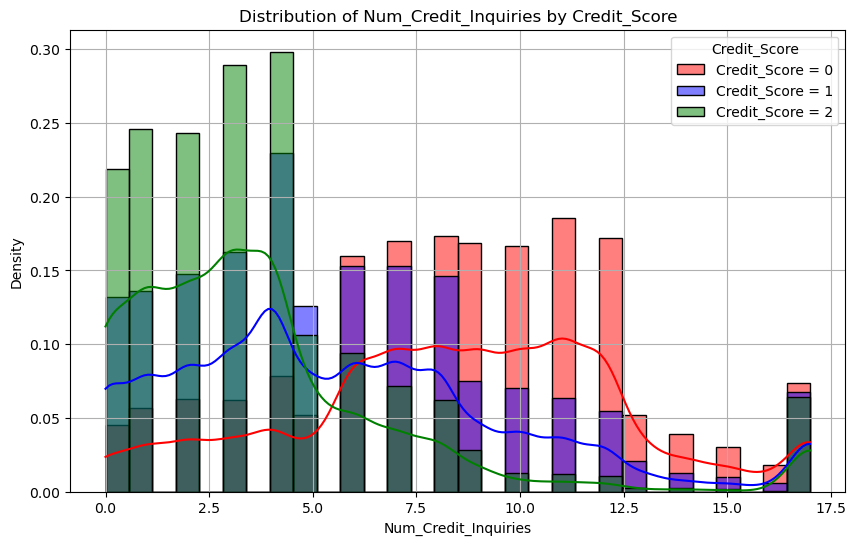

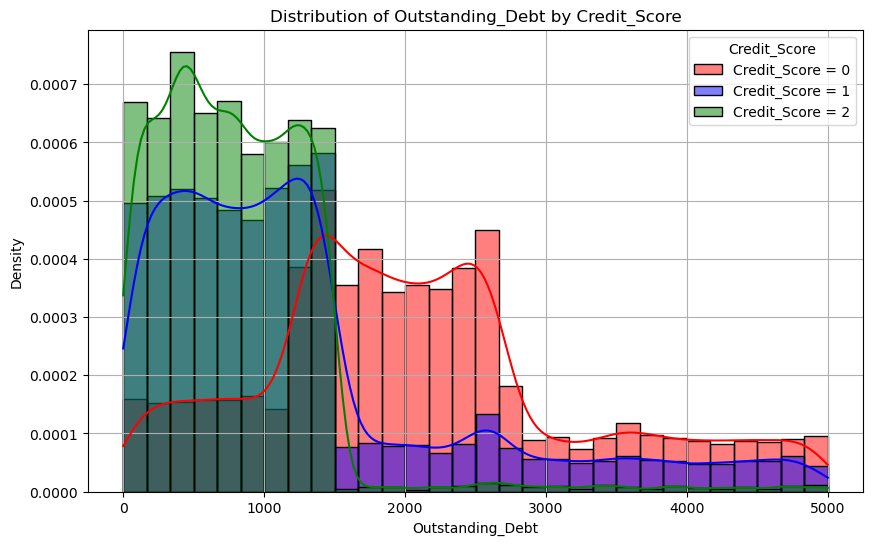

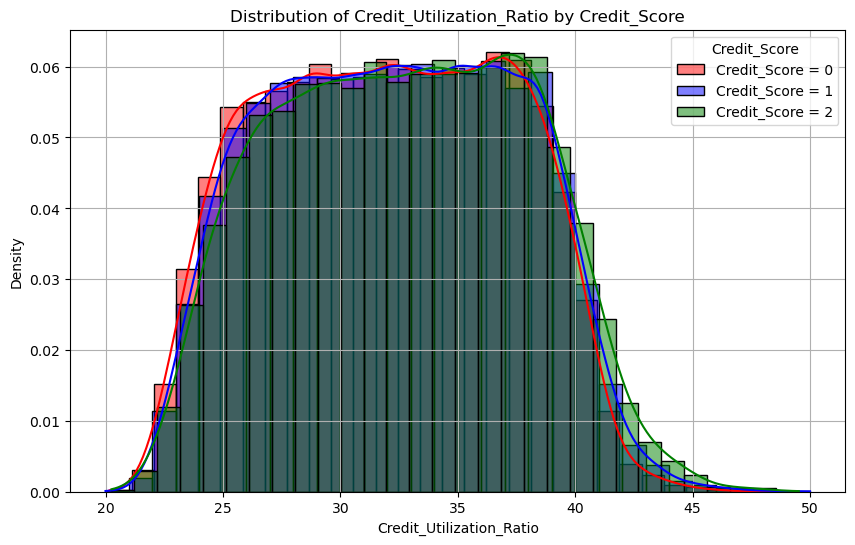

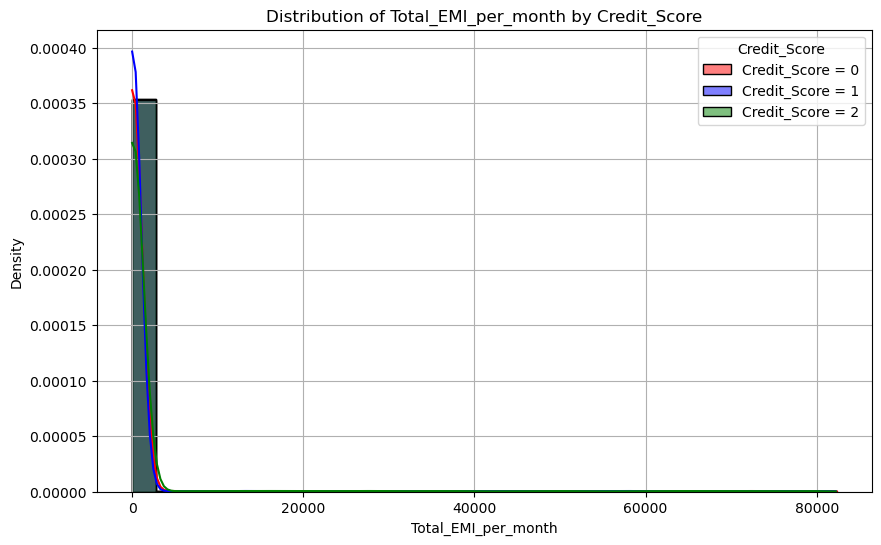

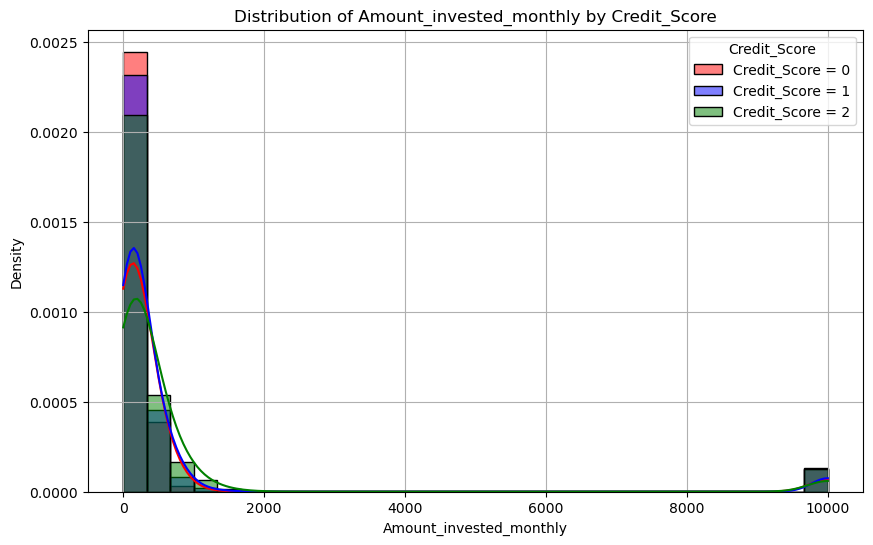

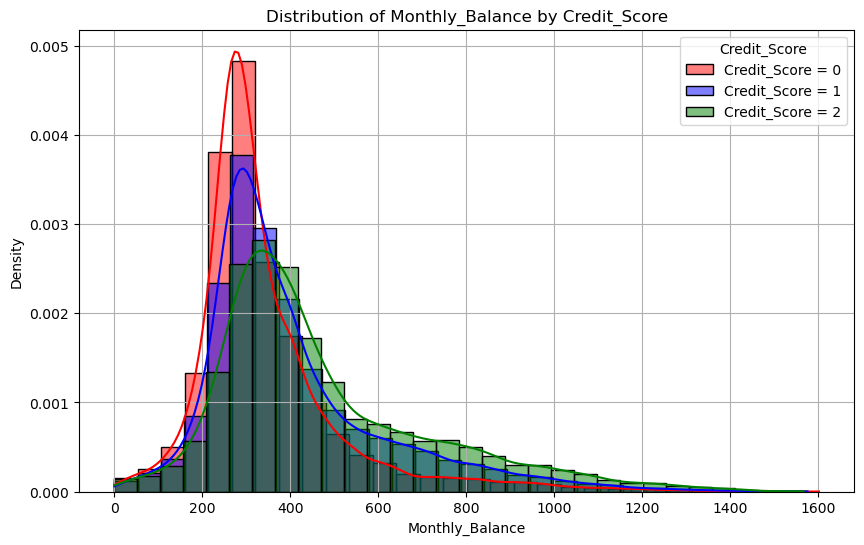

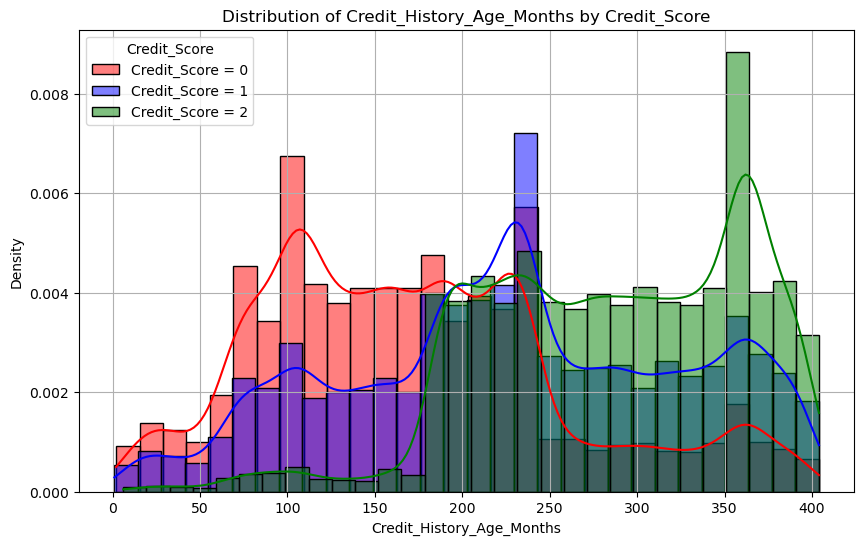

In [34]:
# Set the target variable (Credit_Score) on the y-axis
target = 'Credit_Score'

# Identify predictor variables (all columns except the target)
predictors = [col for col in df.columns if col != target]

# Filter numerical predictors only (exclude categorical variables)
num_predictors = [col for col in predictors if df[col].dtype != 'object']

# Create histograms for each numerical variable with Credit_Score in different colors
for col in num_predictors:
    plt.figure(figsize=(10, 6))
    
    # Filter the data based on Credit_Score categories and plot histograms
    sns.histplot(df[df[target] == 0][col], color='red', label='Credit_Score = 0', kde=True, bins=30, stat='density')
    sns.histplot(df[df[target] == 1][col], color='blue', label='Credit_Score = 1', kde=True, bins=30, stat='density')
    sns.histplot(df[df[target] == 2][col], color='green', label='Credit_Score = 2', kde=True, bins=30, stat='density')
    
    # Title and labels
    plt.title(f'Distribution of {col} by Credit_Score')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='Credit_Score')
    plt.grid(True)
    plt.show()
